In [1]:
from mt_rent_statement import *

### Load data

In [2]:
start='2022-10-01'
end='2022-10-31'
dfT=load_tenancies('all_tenancies.xls')
dfAll=load_data(start,end)
dfAll.head(3)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\OCT2022_codedAndCategorised.xlsx


E:\dtuklaptop\e\Users\Mat\python\14. property\PropertyAnalytics_v2\mt_rent_statement.py:163: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dfAll=pd.concat([dfAll,dfTemp])


,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-10-01,60-83-71 00558156,600.00,REVENUE,NATSO P OCTOBER RENT,F4163FRA,NaN,OurRent,NaN
2022-10-01,60-83-71 00558156,-6.85,ADMIN,Post Office POST OFFICE COUNTER keys to fox an...,F31618ALH,NaN,PropertyExpense,NaN
2022-10-01,60-83-71 00558156,-2691.42,INTEREST_PAYMENTS,Ivana Valentino Mortgages,NaN,NaN,MortgageRefund,NaN


### Rent Statement

In [3]:
paidinadvancelist = ['Jason Moore (23/05/2022)','Peter Gradon (28/02/2018)'] # November
dfRs=get_rent_statement(dfAll, dfT, start, end, [], paidinadvancelist)
dfRs=dfRs.round(0)
#dfRs.sort_values(by=['Net'], ascending=False).style.apply(custom_style, axis=1)
#dfRs.sort_values(by=['Bills'], ascending=True).style.apply(custom_style, axis=1)
dfRs.style.apply(custom_style, axis=1)

,Tenant,Agent,Received,Bills,Mortgage,Net,Status
Property,,,,,,,
321 London Rd,,,0,0,0,0,
Flat 1 - 321 London Rd,,,0,-1113,-249,-1362,Empty
Flat 2 - 321 London Rd,Cipran Georgescu (18/01/2020),None,625,-80,-245,300,Paid
Flat 3 - 321 London Rd,Charles Prescott (01/10/2022),None,260,481,-232,509,New
Flat 4 - 321 London Rd,Susheel Kumar (26/04/2022-28/10/2022),None,0,-72,-249,-321,Ending
169 Fawcett Rd,,,0,-15,0,-15,
Flat 1 - 169 Fawcett Rd,Susan Parkinson (06/11/2016),Beals,421,-4,-224,193,Paid
Flat 2 - 169 Fawcett Rd,Vaclav Hajek (10/08/2019),None,600,0,-230,370,Paid
Flat 3 - 169 Fawcett Rd,August John (14/05/2022),None,675,0,-248,427,Paid


Notes:
- Susheel move out
- 5 empty -> F1, 321, F3 321, F4 321, F8 46, F20 46
- Mark Williams didn't pay
- Moore to start paying again in Dec
- Graddon paid 6 months advance in Sept to March - Gradon was served S13 rent increase

### Income/Expenditure per Property

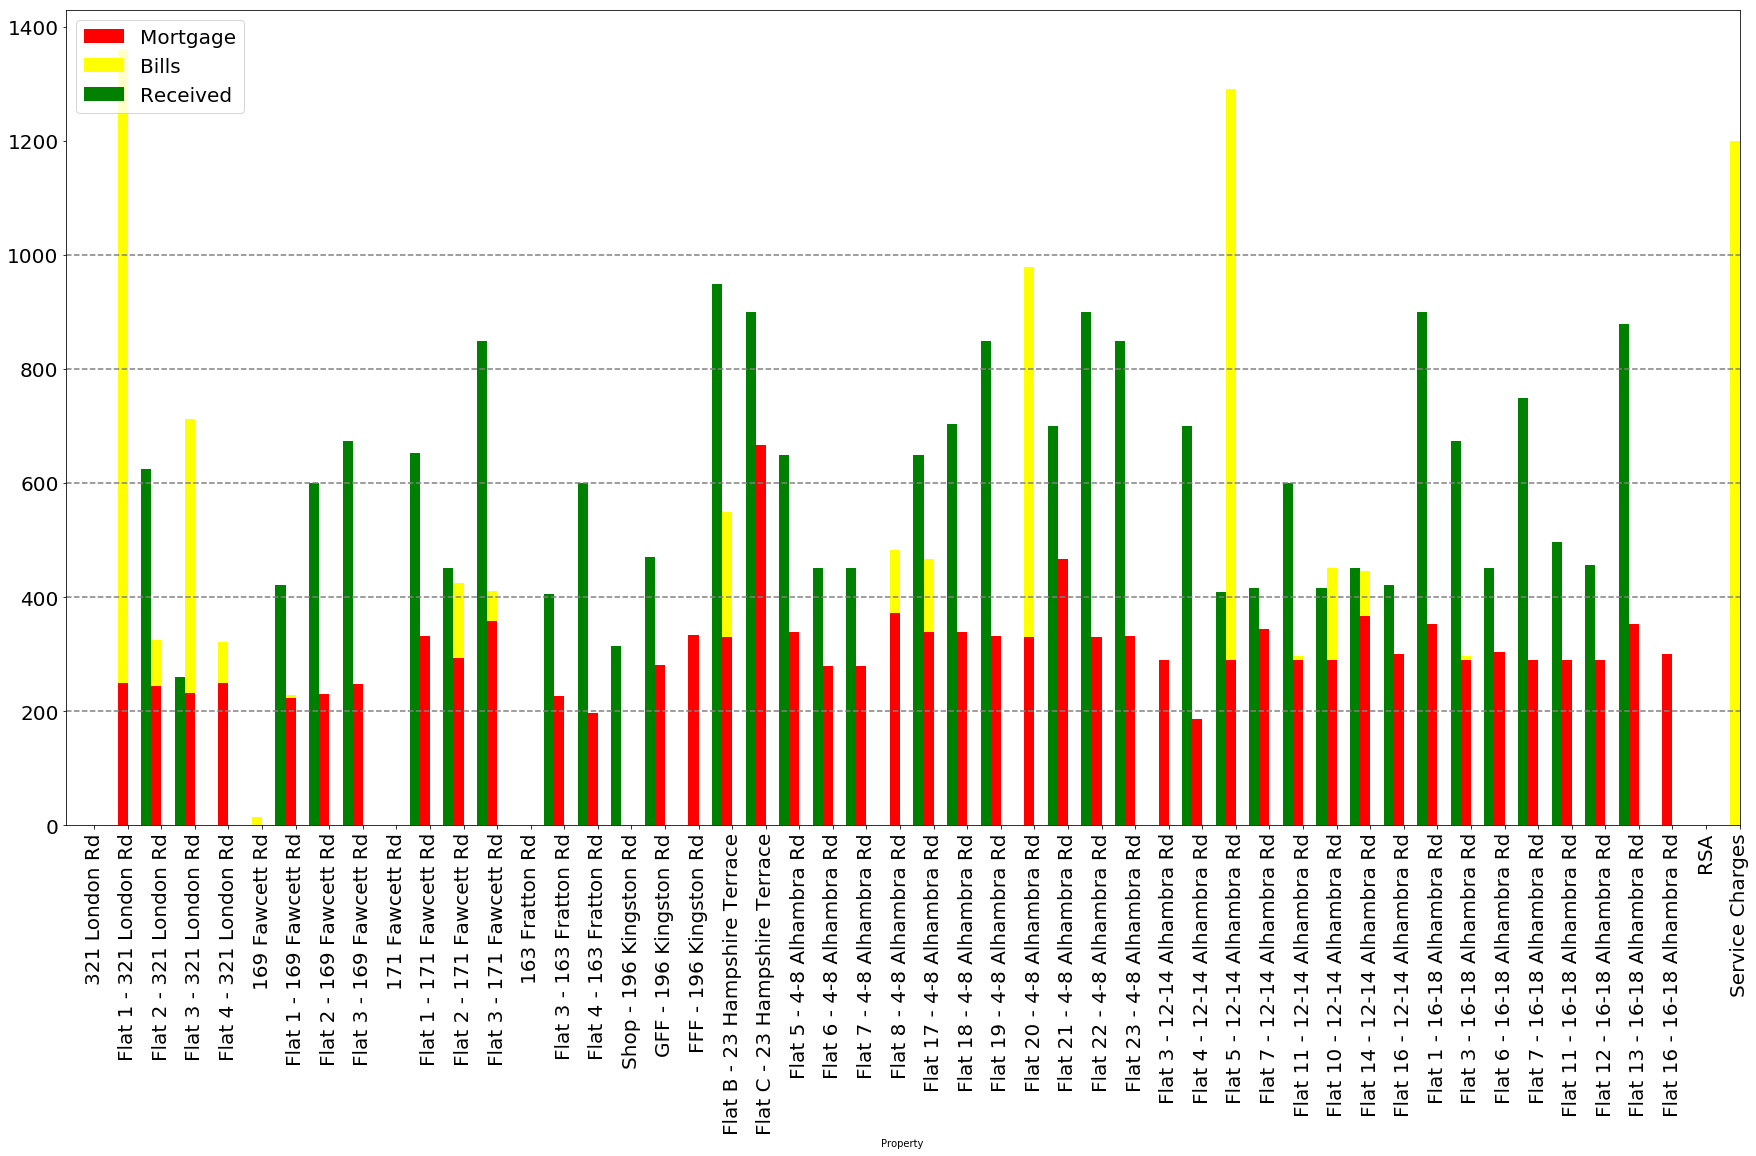

In [4]:
plot_income_expenditure_per_property(dfRs[:-1])

### Net Income Per Property

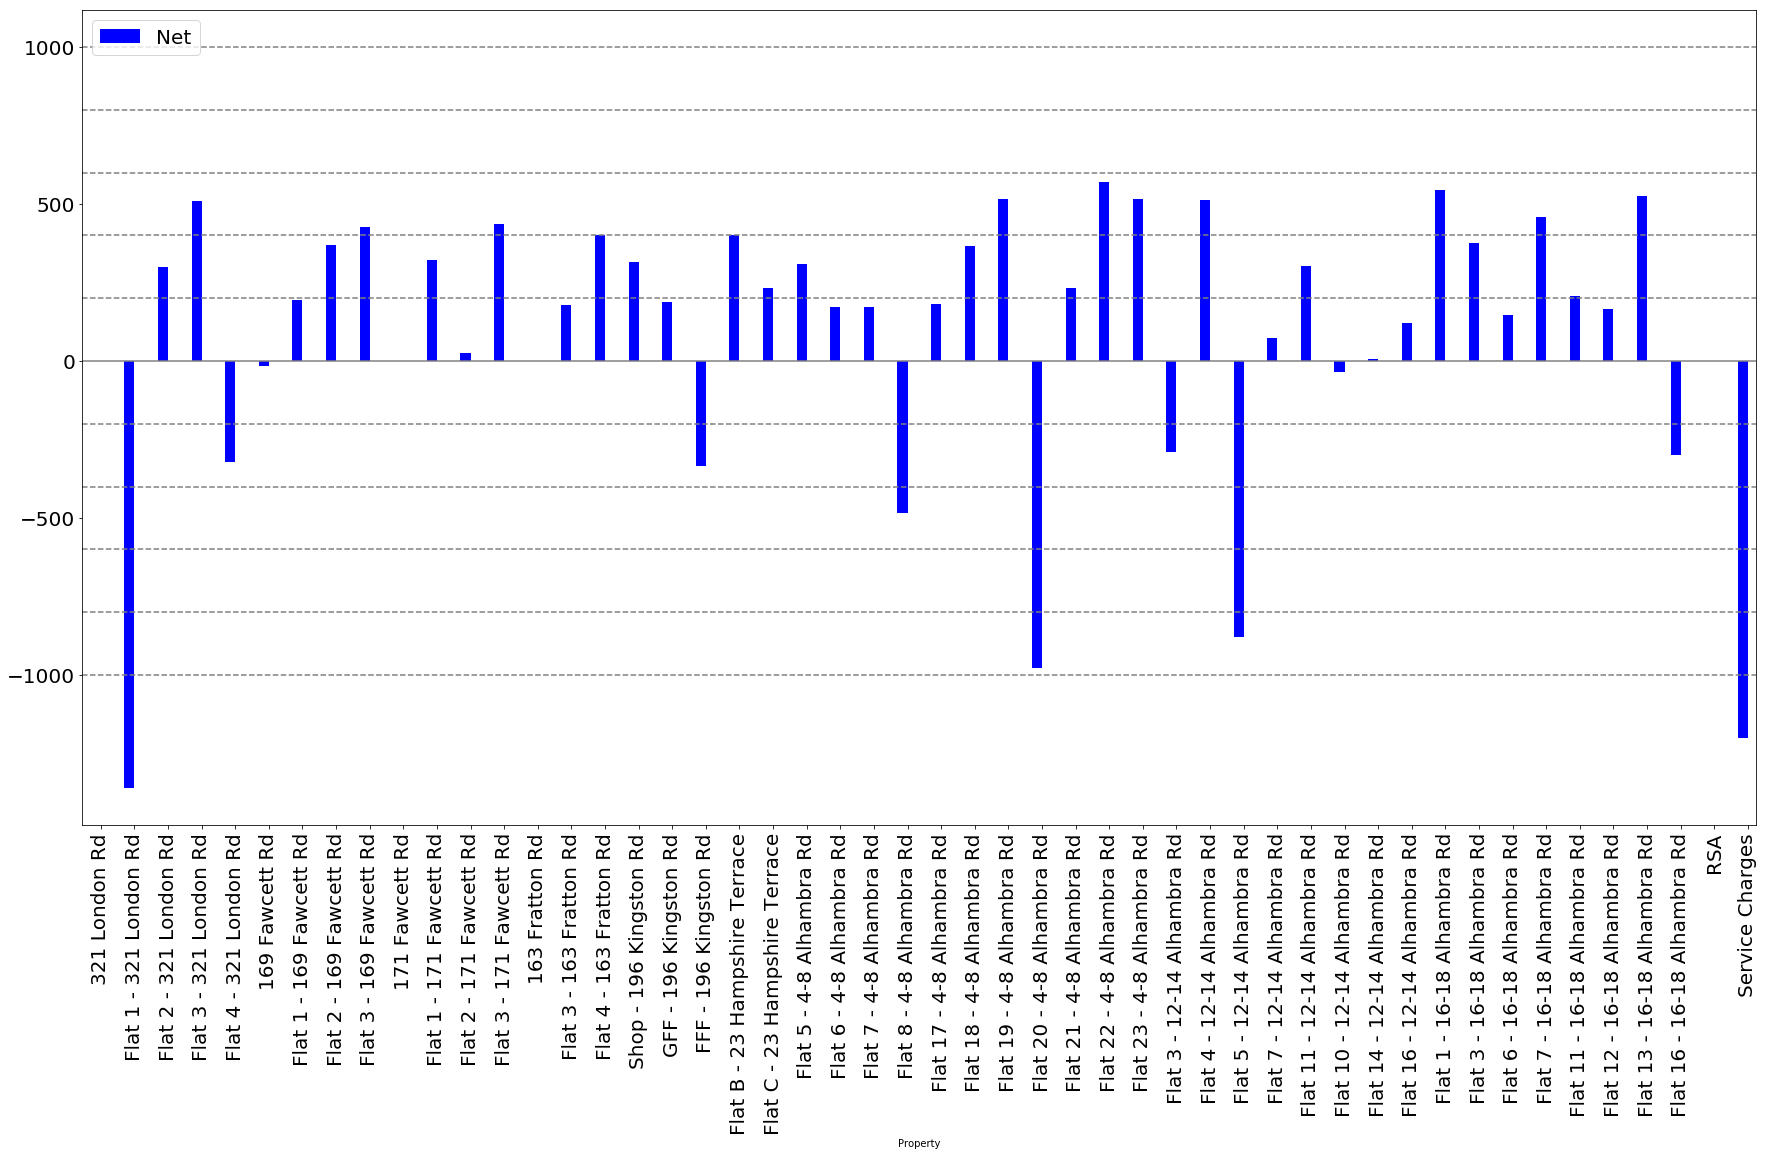

In [5]:
plot_net_income(dfRs[:-1])

### Accounts Check
Check Drawings against expenses

In [6]:
dfAll[(dfAll.Cat=='RegularPayment')|(dfAll.Cat=='PersonalExpense')|(dfAll.Cat=='Hilltop')|(dfAll.Cat=='HMRCDD')|(dfAll.Cat=='Drawings')|(dfAll.Cat=='SchoolFee')].groupby(['Cat']).sum()

,Amount
Cat,
Drawings,-4145.23
HMRCDD,-600.00
Hilltop,-300.00
PersonalExpense,-4399.76
RegularPayment,-1126.38
SchoolFee,-5688.99


In [7]:
dfAll.groupby(['Account','Cat']).sum().style.apply(custom_style_accounts_cat, axis=1)

#### Mortgage check
Check mortgages refunded from business account

In [8]:
dfMtg=dfAll[((dfAll.Cat=='Mortgage')|(dfAll.Cat=='MortgageRefund'))&(dfAll.Account!='60-83-71 00558156')].groupby(['Account','Cat']).Amount.sum()
dfMtg=dfMtg.reset_index().pivot('Account','Cat')
dfMtg.columns=dfMtg.columns.get_level_values(1)
if('MortgageRefund' not in dfMtg.columns):
    dfMtg['MortgageRefund']=0
dfMtg['Diff']=dfMtg.Mortgage + dfMtg.MortgageRefund
dfMtg

Cat,Mortgage,MortgageRefund,Diff
Account,,,
20-53-97 30728691,-5490.42,4985.81,-504.61
20-74-09 60458872,-7800.67,6728.66,-1072.01


In [9]:
dfMtg['Diff'].sum()

-1576.6200000000008

#### Rent check
Rents going to wrong account

In [10]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-10-03,20-53-97 30728691,-820.0,Bill Payment,RSA CAPITAL LIMITE MWILLIAMS 196BRENT BB,196BKIN,NaN,OurRent,NaN
2022-10-07,20-53-97 30728691,260.0,Counter Credit,FLAT3 321LONDON RD SEQUENCE UK LIMI BGC,F3321LON,NaN,OurRent,NaN
2022-10-14,20-53-97 30728691,-260.0,Bill Payment,RSA CAPITAL LIMITE 3321 REM RENT BBP,F3321LON,NaN,OurRent,NaN
2022-10-25,20-53-97 30728691,600.0,Standing Order,MR MICHAEL BETTS FT11 12-14ALHAMBRA ST,F111214ALH,NaN,OurRent,NaN


In [11]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')].groupby(['Cat']).sum()

,Amount
Cat,
OurRent,-220.0


#### Property expense check
Property expenses and service charges taken from 3072 or 6045

In [12]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-10-14,20-74-09 60458872,-15.0,Standing Order,SSE SOUTHERN ELECT 6882766014 STO,169FAW,NaN,PropertyExpense,NaN


In [13]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')].groupby(['Cat']).sum()

,Amount
Cat,
PropertyExpense,-15.0


In [14]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-10-03,20-53-97 30728691,-232.5,Standing Order,ALHAMBRA ROAD MANA 209254 83672832 STO,NaN,NaN,ServiceCharge,NaN
2022-10-03,20-53-97 30728691,-157.5,Standing Order,ALHAMBRA ROAD MANA 209254 23534332 STO,NaN,NaN,ServiceCharge,NaN
2022-10-03,20-53-97 30728691,-160.0,Standing Order,ALHAMBRA ROAD MANA 209254 13686035 STO,NaN,NaN,ServiceCharge,NaN
2022-10-03,20-53-97 30728691,-50.0,Standing Order,23 HAMPSHIRE TERRA 209254 13676978 STO,NaN,NaN,ServiceCharge,NaN
2022-10-03,20-74-09 60458872,-232.5,Standing Order,4-6 ALHAMBRA RD CS 209254 83672832 STO,NaN,NaN,ServiceCharge,NaN
2022-10-03,20-74-09 60458872,-160.0,Standing Order,16-18 ALHAMBRA RD 209254 13686035 STO,NaN,NaN,ServiceCharge,NaN
2022-10-03,20-74-09 60458872,-50.0,Standing Order,23 HAMPSHIRE TERRA 209254 13676978 STO,NaN,NaN,ServiceCharge,NaN
2022-10-03,20-74-09 60458872,-157.5,Standing Order,12-14 ALHAMBRA RD 209254 23534332 STO,NaN,NaN,ServiceCharge,NaN


In [15]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')].groupby(['Cat']).sum()

,Amount
Cat,
ServiceCharge,-1200.0
